In [1]:
from linescanning import preproc, utils,dataset
import matplotlib.pyplot as plt

In [3]:
pkl_file = "/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/nighres/sub-001/ses-3/sub-001_ses-3_task-SRFa_run-1_desc-segmentations.pkl"

seg = preproc.Segmentations(
    "sub-001",
    pickle_file=pkl_file,
    verbose=True,
    reference_slice="/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/sub-001/ses-3/anat/sub-001_ses-3_task-SRFa_run-1_acq-1slice_T1w.nii.gz"
)

 Reading /data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/nighres/sub-001/ses-3/sub-001_ses-3_task-SRFa_run-1_desc-segmentations.pkl
 Beam location = [352,368]; shift=0mm
 Found 21 voxel(s) for nuisance regression; (indices<300 are ignored due to distance from coil)


In [4]:
seg.reference_slice

'/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/sub-001/ses-3/anat/sub-001_ses-3_task-SRFa_run-1_acq-1slice_T1w.nii.gz'

In [5]:
# for key,val in seg.beam_in_slice["sub-001"].items():
#     print(f"{key}: {val}")

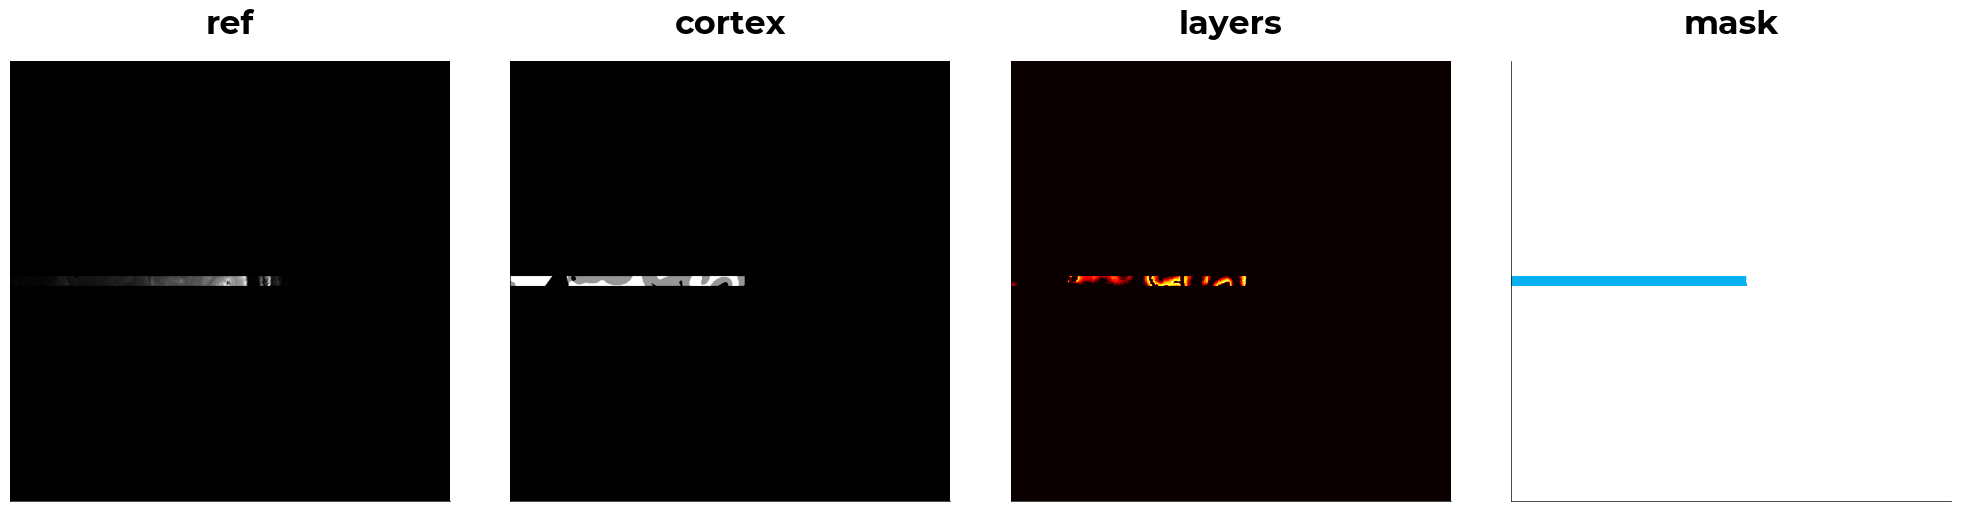

In [8]:
%matplotlib inline
seg.plot_beam_in_slice(
    include=["ref","cortex","layers","mask"]
)

In [9]:
seg.wm_csf_voxels_for_regressors()
# seg.csf_voxels

 Beam location = [352,368]; shift=0mm


In [10]:
# %matplotlib inline
# fig,axs = plt.subplots(figsize=(5,5))
# ctx = nb.load("/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/nighres/sub-001/ses-3/sub-001_ses-3_task-SRFa_run-1_acq-1slice_desc-cortex.nii.gz").get_fdata().squeeze()
# axs.imshow(np.rot90(seg.cortex), cmap="Greys_r")
# axs.imshow(np.rot90(seg.line), cmap=utils.make_binary_cm("r"))

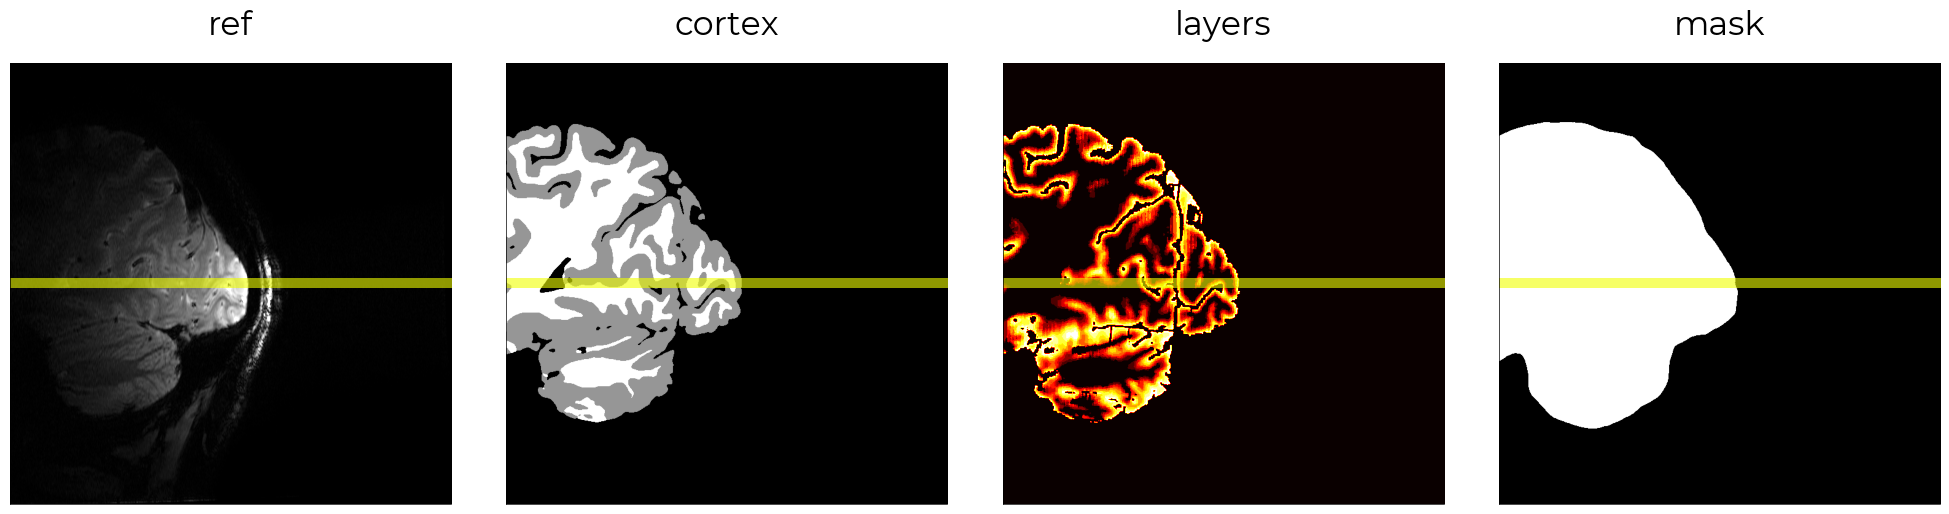

In [11]:
seg.plot_segmentations(
    include=['ref', 'cortex', 'layers','mask'], 
    cmaps=['Greys_r', 'Greys_r', 'hot','Greys_r'], 
)

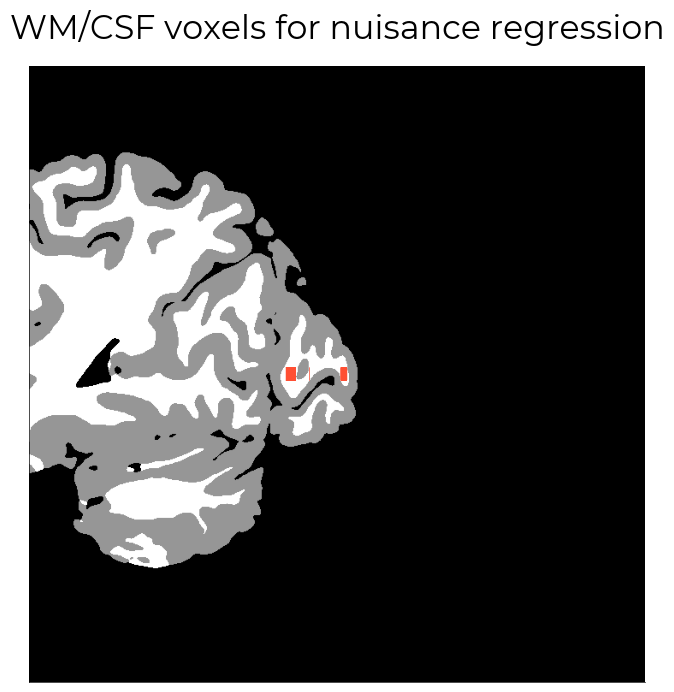

In [12]:
seg.plot_regressor_voxels()

In [43]:
sub = "006"
ses = 3
task = "SRFa"
run = 1
suff = "0p"

ffunc = f"/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/sub-{sub}/ses-{ses}/func/sub-{sub}_ses-{ses}_task-{task}_run-{run}_desc-{suff}_bold.mat"
ffunc = "/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/sub-006/ses-3/func/sub-006_ses-3_task-SRFa_run-4_desc-0p_bold.mat"
obj = dataset.ParseFuncFile(
    ffunc,
    filter_strategy="hp"
)


FUNCTIONAL
Preprocessing /data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/sub-006/ses-3/func/sub-006_ses-3_task-SRFa_run-4_desc-0p_bold.mat
 Filtering strategy: 'hp'
 Standardization strategy: 'psc'
 Baseline is 20 seconds, or 190 TRs
 Cutting 0 volumes from beginning (also cut from baseline (was 190, now 190 TRs) | 0 volumes from end
 DCT-high pass filter [removes low frequencies <0.01 Hz] to correct low-frequency drifts.
 tSNR [no cleaning]: 4.94	| variance: 15.2


 Reading /data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/nighres/sub-006/ses-3/sub-006_ses-3_task-SRFa_run-4_desc-segmentations.pkl
 Beam location = [352,368]; shift=0mm
 Found 18 voxel(s) for nuisance regression; (indices<300 are ignored due to distance from coil)
 Using 5 components for aCompCor (WM/CSF separately)
None
I should be here?
 PCA for 'csf' was unsuccessful. Using all un-PCA'd timecourses (7)
0
I should be here?
 PCA for 'wm' was unsuccessful. Using all un-PCA'd timecourses (11)
 DCT high-pass filter on components [removes low frequencies <0.1 Hz]


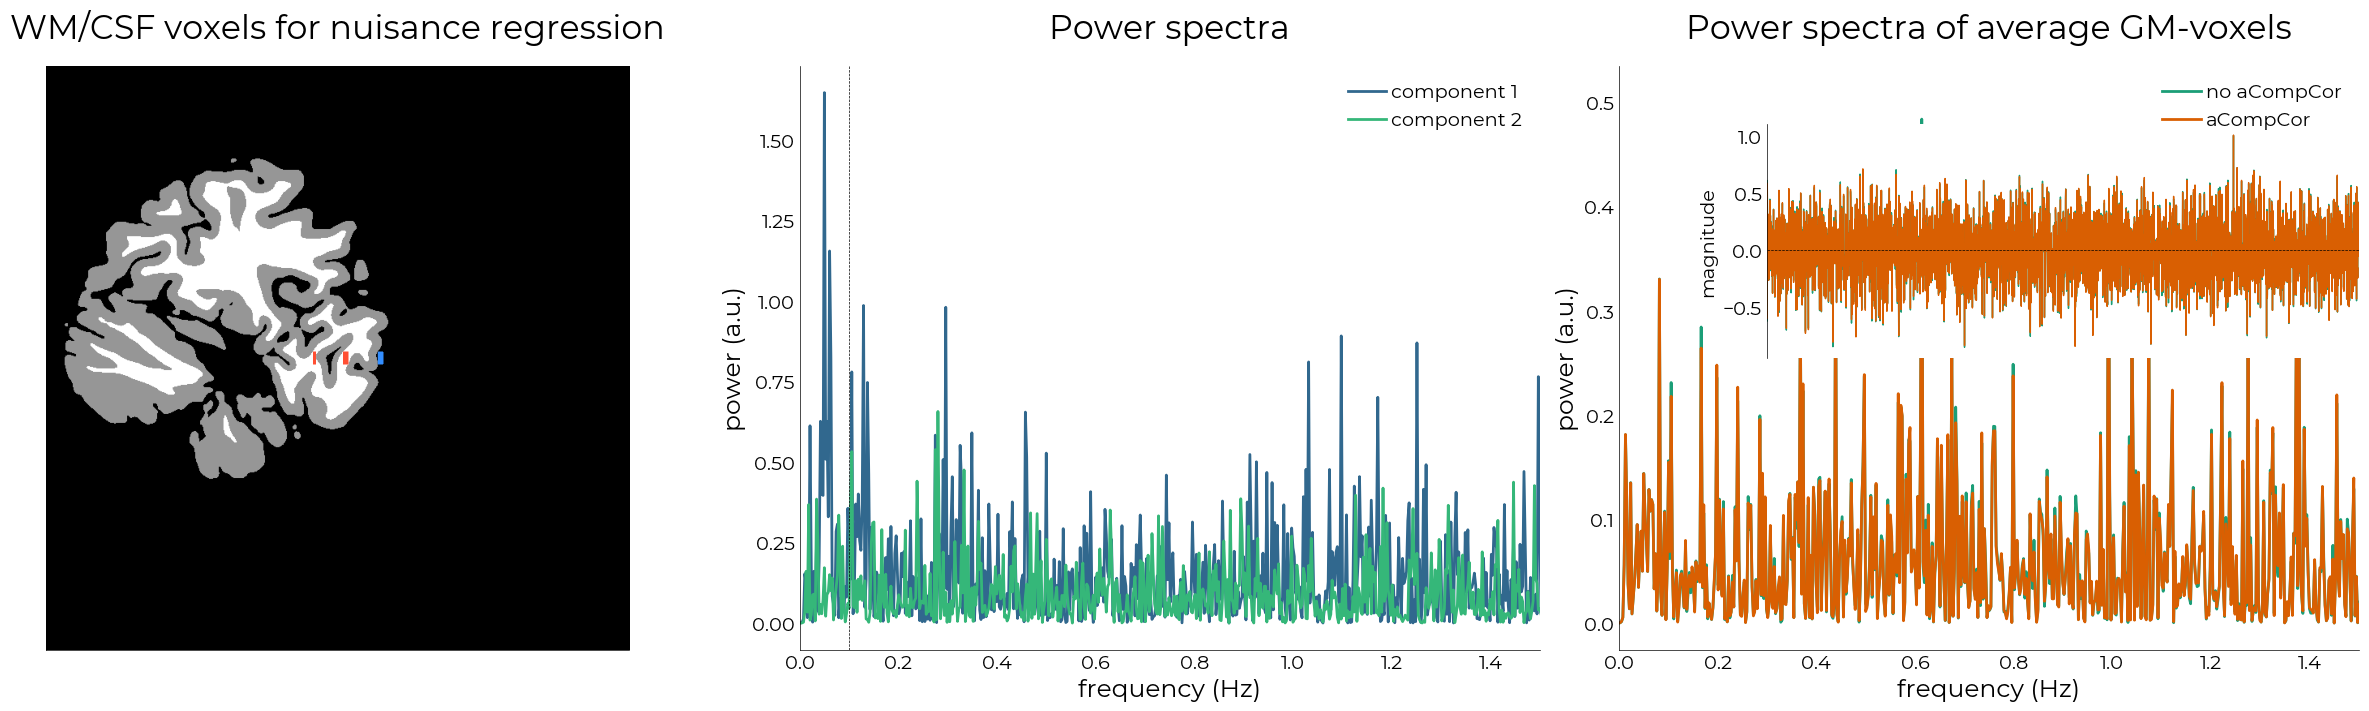

In [49]:
%matplotlib inline
from linescanning import utils
ref_slice = f"/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/sub-{obj.sub}/ses-{obj.ses}/anat/sub-{obj.sub}_ses-{obj.ses}_task-{obj.task}_run-{obj.run}_acq-1slice_T1w.nii.gz"

comps = utils.split_bids_components(ffunc)
ac = preproc.aCompCor(
    obj.hp_zscore_df,
    subject=f"sub-{obj.sub}",
    run=obj.run,
    task=obj.task,
    trg_session=obj.ses,
    reference_slice=ref_slice,
    filter_confs=0.1,
    # voxel_cutoff=300,
    verbose=True
)

In [12]:
ac.tissue_pca

{'wm': True, 'csf': False}

In [13]:
ac.pca_but_timecourses

{'wm': False, 'csf': True}

In [16]:
if ac.tissue_pca["wm"] or ac.tissue_pca["csf"] or ac.pca_but_timecourses["wm"] or ac.pca_but_timecourses["csf"]:
    print("GO GO GO ")
    if (ac.tissue_pca["wm"] or ac.pca_but_timecourses["wm"]) and (ac.tissue_pca["csf"] or ac.pca_but_timecourses["csf"]):
        print("CSF & WM")

GO GO GO 
CSF & WM


 Reading /data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/nighres/sub-001/ses-3/sub-001_ses-3_task-SRFa_run-3_desc-segmentations.pkl
 Beam location = [352,368]; shift=0mm
 Found 37 voxel(s) for nuisance regression; (indices<150 are ignored due to distance from coil)
 Using 5 components for aCompCor (WM/CSF separately)
 PCA for 'csf' was unsuccessful because no voxels were found
 PCA for 'wm' was unsuccessful. Using all un-PCA'd timecourses (37)
 DCT high-pass filter on components [removes low frequencies <0.1 Hz]


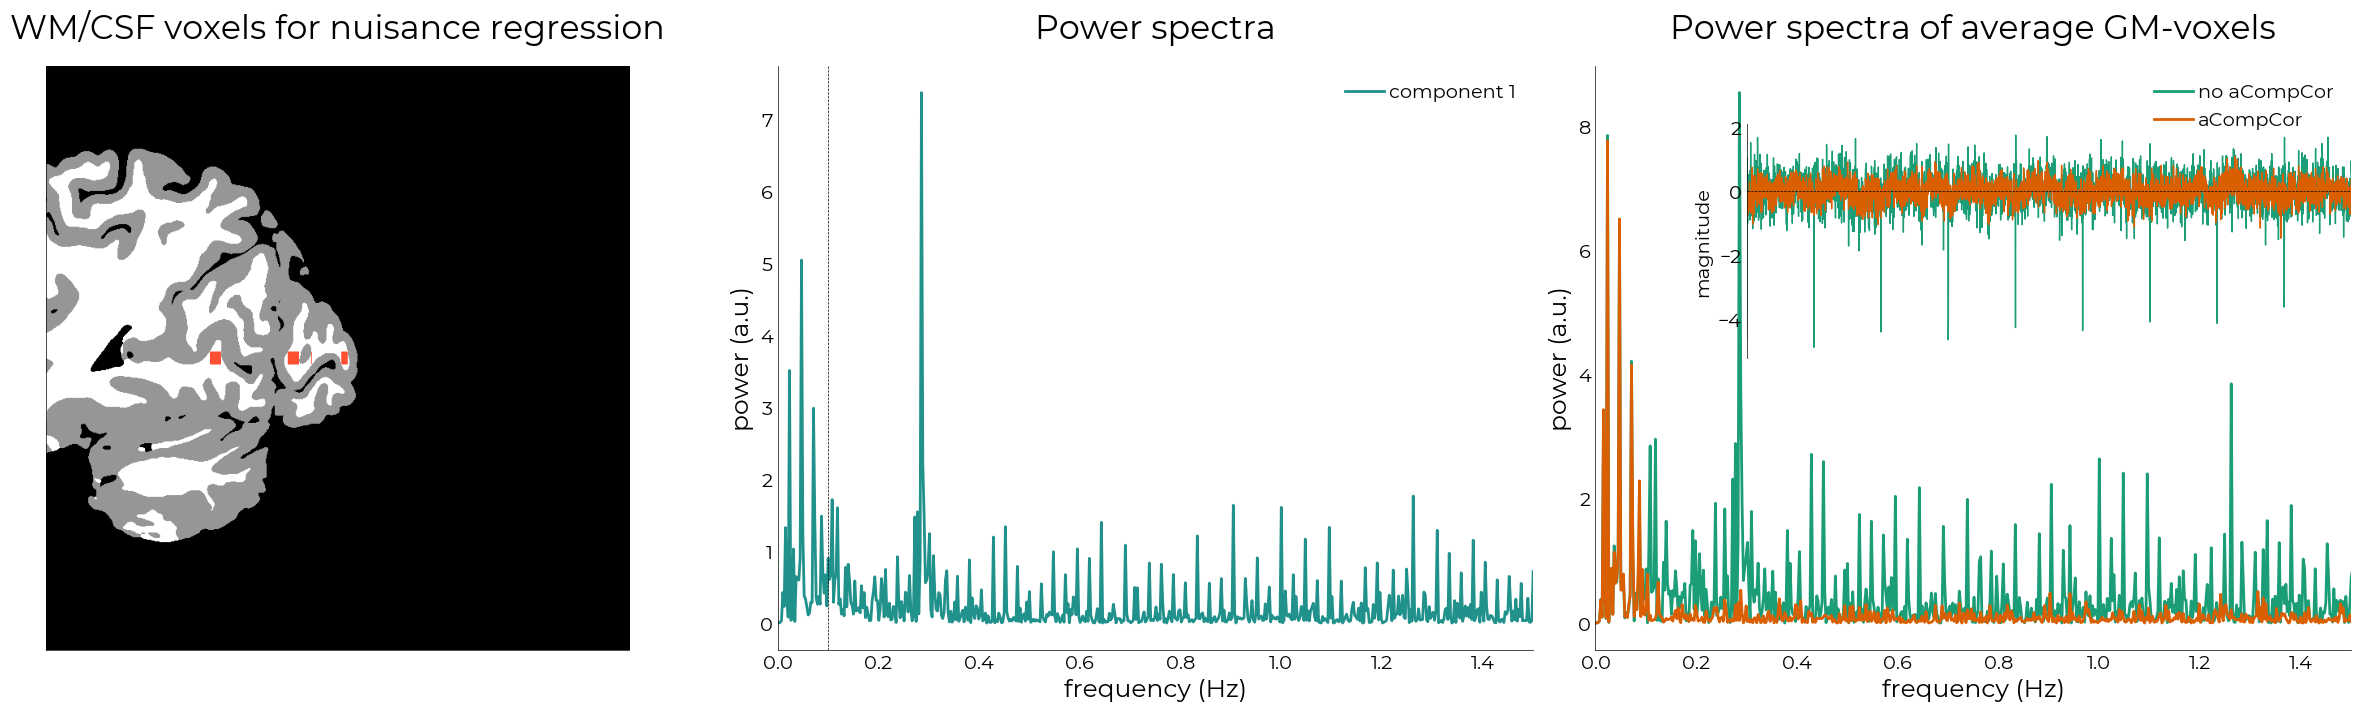

In [63]:
ac = preproc.aCompCor(
    obj.hp_zscore_df,
    subject="sub-001",
    run=3,
    task="SRFa",
    trg_session=3,
    reference_slice=seg.reference_slice,
    filter_confs=0.1,
    voxel_cutoff=150,
    verbose=True
)